<a href="https://colab.research.google.com/github/onkar-99/Doodle-in-Air/blob/main/doodle_training_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Download Dataset** 
####You don't need to do this step if you're not using Colab and downloading it from Drive

In [ ]:
!unzip "/content/drive/MyDrive/Dataset_csv_npy_64x1.zip"

Archive:  /content/drive/MyDrive/Dataset_csv_npy_64x1.zip
  inflating: Dataset_csv_npy_64x1/airplane.npy  
  inflating: Dataset_csv_npy_64x1/alarm clock.npy  
  inflating: Dataset_csv_npy_64x1/apple.npy  
  inflating: Dataset_csv_npy_64x1/arm.npy  
  inflating: Dataset_csv_npy_64x1/axe.npy  
  inflating: Dataset_csv_npy_64x1/backpack.npy  
  inflating: Dataset_csv_npy_64x1/banana.npy  
  inflating: Dataset_csv_npy_64x1/bandage.npy  
  inflating: Dataset_csv_npy_64x1/baseball bat.npy  
  inflating: Dataset_csv_npy_64x1/basketball.npy  
  inflating: Dataset_csv_npy_64x1/bed.npy  
  inflating: Dataset_csv_npy_64x1/belt.npy  
  inflating: Dataset_csv_npy_64x1/birthday cake.npy  
  inflating: Dataset_csv_npy_64x1/book.npy  
  inflating: Dataset_csv_npy_64x1/bucket.npy  
  inflating: Dataset_csv_npy_64x1/butterfly.npy  
  inflating: Dataset_csv_npy_64x1/candle.npy  
  inflating: Dataset_csv_npy_64x1/ceiling fan.npy  
  inflating: Dataset_csv_npy_64x1/cell phone.npy  
  inflating: Dataset_csv

In [ ]:
!unzip "/content/drive/MyDrive/doodle_64x1(92%).zip"

Archive:  /content/drive/MyDrive/doodle_64x1(92%).zip
  inflating: doodle_64x1(92%).h5     


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
import matplotlib.figure
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
rows=4
cols=5
vfold_ratio=0.1, 
max_items_per_class=3000
img_size=64
batch_size=32


#39
epochs=100

#300X300

In [ ]:
all_files = glob.glob(os.path.join('/content/Dataset_csv_npy_64x1', '*.npy'))
all_files.sort()
len(all_files)

26

In [ ]:
#initialize variables 
x = np.empty([0, 64,64,1])
y = np.empty([0])
class_names = []
#test_label=[]
#testx=np.empty([0,784])
    #load each data file 
for idx, file in enumerate(all_files):
    data = np.load(file)
    #test = data[0:max_items_per_class, :]
    data = data[0: max_items_per_class, :]
    labels = np.full(data.shape[0], idx)
    x = np.concatenate((x, data), axis=0)
    #testx= np.concatenate((testx, test), axis=0)
    y = np.append(y, labels)

    class_name, ext = os.path.splitext(os.path.basename(file))
    class_name=class_name.split('_')[-1].split('.')[0]
    class_names.append(class_name)
data = None
labels = None
    
    #randomize the dataset 
permutation = np.random.permutation(y.shape[0])
X_train = x[permutation, :]
y = y[permutation].astype(int)

X_train.shape

(78000, 64, 64, 1)

In [ ]:
#X = X.reshape(X.shape[0], img_size, img_size, 1).astype('float32')
#testx = testx.reshape(testx.shape[0], img_size, img_size, 1).astype('float32')
#testx /= 255.0
X_train /= 255.0



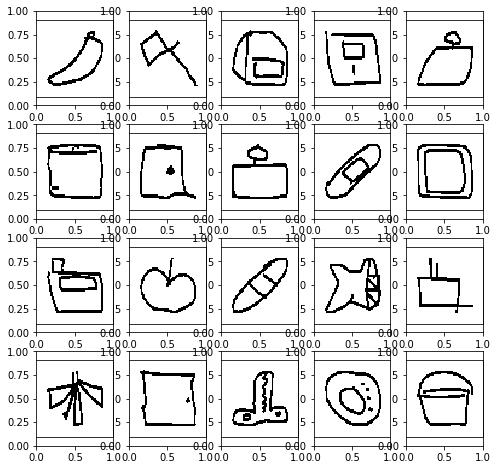

In [ ]:
fig, axes = plt.subplots(rows,cols, figsize=(8,8))
for i in list(range(0, min(len(X_train),(rows*cols)) )):    
    #fig = matplotlib.figure.Figure()
    a = fig.add_subplot(rows,cols,i+1)
    #a.text(10., -1.5, f'{class_names[y[i]]}')
    imgplot = plt.imshow(X_train[i].reshape((64,64)), interpolation='nearest',cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])

In [ ]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, len(class_names))
y.shape

(78000, 26)

In [ ]:
#X_train /= 255.0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20, random_state=0)

X_train=X_train.reshape(X_train.shape[0],64,64,1)
X_test=X_test.reshape(X_test.shape[0],64,64,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(62400, 64, 64, 1)
(15600, 64, 64, 1)
(62400, 26)
(15600, 26)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.applications.vgg16 import VGG16
from keras.applications.nasnet import NASNetLarge
from keras.applications.xception import Xception
from keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
#resnet = NASNetLarge(include_top=True,weights='imagenet')
from keras.models import Model
from keras.applications.resnet50 import ResNet50


In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3),padding='same',input_shape=X_train.shape[1:], activation='relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(Conv2D(16, (3, 3),padding='same',input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation= 'relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation= 'relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(26, activation='softmax')) 


In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3),padding='same',kernel_initializer='glorot_normal',input_shape=X_train.shape[1:], activation='relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(Conv2D(16, (3, 3),padding='same',input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation= 'relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation= 'relu'))
model.add(BatchNormalization(momentum = 0.8))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(26, activation='softmax')) 


In [ ]:
model_r = ResNet50(include_top = True, weights= None, input_shape=(64, 64, 1), classes = 26)
model_r.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 128)       1280      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        18448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        9280      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 16)       

In [ ]:
from keras.optimizers import Adam


model.compile(optimizer=Adam(0.001),loss ="categorical_crossentropy",metrics=['acc'])


In [ ]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
erlystop=EarlyStopping(monitor='val_acc', min_delta=0, patience=7, verbose=0,mode='max', baseline=None)
cp_callback = ModelCheckpoint('/content/checkpoint', verbose=1, save_weights_only=True,save_freq='epoch',save_best_only=True,monitor='val_acc',mode='max')
rlrop = ReduceLROnPlateau(monitor='val_acc', patience=3,verbose=1,mode='max')

In [ ]:
model.fit(X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      #validation_split=0.3, # 1000 images = batch_size * steps
      validation_data=(X_test,y_test),	
      callbacks=[cp_callback,rlrop,erlystop],
      verbose=1)


Epoch 1/100
1950/1950 [==============================] - 25s 13ms/step - loss: 1.8791 - acc: 0.4895 - val_loss: 0.6435 - val_acc: 0.8106

Epoch 00001: val_acc improved from -inf to 0.81064, saving model to /content/checkpoint
Epoch 2/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.7667 - acc: 0.7725 - val_loss: 0.4918 - val_acc: 0.8537

Epoch 00002: val_acc improved from 0.81064 to 0.85365, saving model to /content/checkpoint
Epoch 3/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.6196 - acc: 0.8166 - val_loss: 0.4305 - val_acc: 0.8732

Epoch 00003: val_acc improved from 0.85365 to 0.87321, saving model to /content/checkpoint
Epoch 4/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.5388 - acc: 0.8393 - val_loss: 0.3875 - val_acc: 0.8858

Epoch 00004: val_acc improved from 0.87321 to 0.88577, saving model to /content/checkpoint
Epoch 5/100
1950/1950 [==============================] - 24s 12ms/step - loss: 0.4907 -

In [ ]:

model.evaluate(X_test,y_test)

488/488 [==============================] - 2s 5ms/step - loss: 0.2240 - acc: 0.9368


[0.22395086288452148, 0.9367948770523071]

In [ ]:
model.save('doodle_best(93%).h5')

In [ ]:
from keras.models import load_model

model = load_model('/content/checkpoint')

OSError: ignored

In [ ]:
all_files = glob.glob(os.path.join('/content/', '*.npy'))
all_files

['/content/Player bhoomika-draw.npy',
 '/content/Player onkar-draw.npy',
 '/content/Player shanivi-draw.npy']

In [ ]:
#initialize variables 
x = np.empty([0, 64,64,1])
y = np.empty([0])
#test_label=[]
#testx=np.empty([0,784])
    #load each data file 
for file in all_files:
  data = np.load(file)
    #test = data[0:max_items_per_class, :]
    #data = data[0: max_items_per_class, :]
    #labels = np.full(data.shape[0], idx)
  x = np.concatenate((x, data), axis=0)
    #testx= np.concatenate((testx, test), axis=0)
#x /= 255.0
_,idx=np.unique(x, axis=0,return_index=True)
x=x[np.sort(idx)]
print(x.shape)


(4, 64, 64, 1)


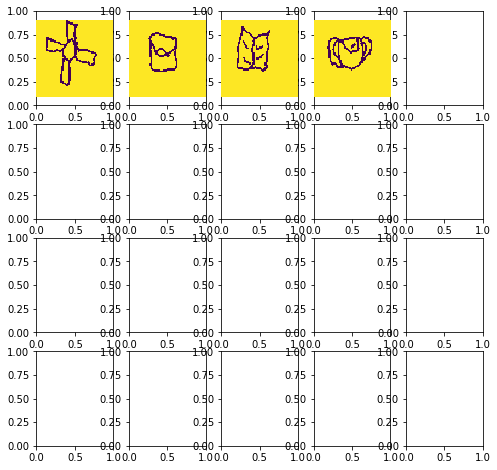

In [ ]:
fig, axes = plt.subplots(rows,cols, figsize=(8,8))
for i in list(range(0, min(len(x),(rows*cols)) )):    
    #fig = matplotlib.figure.Figure()
    a = fig.add_subplot(rows,cols,i+1)
    imgplot = plt.imshow(x[i].reshape((64,64)), interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

In [ ]:
class_names = []
class_names=['t-shirt', 'book', 'door', 'axe', 'banana', 'donut', 'belt', 'eyeglasses', 'butterfly', 'alarm clock', 'lollipop', 'cell phone', 'scissors', 'bucket', 'basketball', 'bed', 'airplane', 'ceiling fan', 'backpack', 'apple', 'baseball bat', 'chair', 'candle', 'arm', 'bandage', 'birthday cake']
class_names=sorted(class_names)


In [ ]:
pred=model.predict(x)
predictions=[]
for p in pred:
  predictions.append(class_names[np.argmax(p)])
print(predictions)
#if class_name == catego  ry_name:
#  score+=1
#else:
#  pass

['ceiling fan', 'axe', 'bandage', 'eyeglasses']


In [ ]:
class_name=class_names[np.argmax(pred[0])]
print(class_name)
#if class_name == category_name:
#  score+=1
#else:
#  pass

eyeglasses


In [ ]:
!unzip "/content/drive/My Drive/Dataset_csv.zip"

Archive:  /content/drive/My Drive/Dataset_csv.zip
   creating: Dataset_csv/
  inflating: Dataset_csv/airplane.csv  
  inflating: Dataset_csv/alarm clock.csv  
  inflating: Dataset_csv/apple.csv   
  inflating: Dataset_csv/arm.csv     
  inflating: Dataset_csv/axe.csv     
  inflating: Dataset_csv/backpack.csv  
  inflating: Dataset_csv/banana.csv  
  inflating: Dataset_csv/bandage.csv  
  inflating: Dataset_csv/baseball bat.csv  
  inflating: Dataset_csv/basketball.csv  
  inflating: Dataset_csv/bed.csv     
  inflating: Dataset_csv/belt.csv    
  inflating: Dataset_csv/birthday cake.csv  
  inflating: Dataset_csv/book.csv    
  inflating: Dataset_csv/bucket.csv  
  inflating: Dataset_csv/butterfly.csv  
  inflating: Dataset_csv/candle.csv  
  inflating: Dataset_csv/ceiling fan.csv  
  inflating: Dataset_csv/cell phone.csv  
  inflating: Dataset_csv/chair.csv   
  inflating: Dataset_csv/donut.csv   
  inflating: Dataset_csv/door.csv    
  inflating: Dataset_csv/eyeglasses.csv  
  infla

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import os
import matplotlib.figure
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
import ast
all_files = glob.glob(os.path.join('/content/Dataset_csv', '*.csv'))
all_files.sort()
all_files

['/content/Dataset_csv/airplane.csv',
 '/content/Dataset_csv/alarm clock.csv',
 '/content/Dataset_csv/apple.csv',
 '/content/Dataset_csv/arm.csv',
 '/content/Dataset_csv/axe.csv',
 '/content/Dataset_csv/backpack.csv',
 '/content/Dataset_csv/banana.csv',
 '/content/Dataset_csv/bandage.csv',
 '/content/Dataset_csv/baseball bat.csv',
 '/content/Dataset_csv/basketball.csv',
 '/content/Dataset_csv/bed.csv',
 '/content/Dataset_csv/belt.csv',
 '/content/Dataset_csv/birthday cake.csv',
 '/content/Dataset_csv/book.csv',
 '/content/Dataset_csv/bucket.csv',
 '/content/Dataset_csv/butterfly.csv',
 '/content/Dataset_csv/candle.csv',
 '/content/Dataset_csv/ceiling fan.csv',
 '/content/Dataset_csv/cell phone.csv',
 '/content/Dataset_csv/chair.csv',
 '/content/Dataset_csv/donut.csv',
 '/content/Dataset_csv/door.csv',
 '/content/Dataset_csv/eyeglasses.csv',
 '/content/Dataset_csv/lollipop.csv',
 '/content/Dataset_csv/scissors.csv',
 '/content/Dataset_csv/t-shirt.csv']

In [ ]:
import cv2
from PIL import Image
im_size = 64
n_class = 26

# redefine
def draw_to_img(strokes, im_size = im_size):
    fig, ax = plt.subplots()                        # plot the drawing as we did above
    for x, y in strokes:
        ax.plot(x, -np.array(y), lw = 10)
    ax.axis('off')
    
    fig.canvas.draw()                               # update a figure that has been altered
    A = np.array(fig.canvas.renderer._renderer)     # converting them into array
    
    plt.close('all')
    plt.clf()
    
    A = (cv2.resize(A, (im_size, im_size)))  # image resizing to uniform format
    A=A[:, :, :3]  
    image=Image.fromarray(A)  
    black = (0,0,0)
    white=(255,255,255)
    pixels = image.getdata()
    newPixels = []

# Compare each pixel 
    for pixel in pixels:
      if pixel != white:
        newPixels.append(black)
      else:
        newPixels.append(white)
    newImg = Image.new("RGB",image.size)
    newImg.putdata(newPixels)
    img = cv2.cvtColor(np.float32(newImg), cv2.COLOR_BGR2GRAY).reshape(64,64,1)
    return img






In [ ]:
class_names=[]
all_files = sorted(glob.glob(os.path.join('/content/Dataset_csv/', '*.csv')))
for name in all_files:
  class_names.append(name.split('/')[-1].split('.')[0])
class_names=sorted(class_names)
all_files[3]


'/content/Dataset_csv/arm.csv'

In [ ]:
import ast
from google.colab import files

n_samples = 3000
    #print(a)
    #filename = dir_path + a + '.csv'
X_save = np.empty([0, 64,64,1])
df = pd.read_csv(all_files[3], usecols=['drawing', 'word','recognized'])  # import the data in chunks
df=df[df['recognized'] == True][:n_samples].reset_index()
df['drawing'] = df.drawing.map(ast.literal_eval)                          # convert strings into list
X = df.drawing.values
for i in range(0,n_samples):
    img=draw_to_img(X[i])
    img=img.reshape(1,64,64,1)
    X_save=np.concatenate((X_save, img), axis=0)
print(filename)
np.save(df.word[0]+'.npy', X_save)    
files.download(df.word[0]+'.npy')
                # covert strokes into array


/content/Dataset_csv/t-shirt.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import files

files.download('/content/bandage.npy')
files.download('/content/alarm clock.npy')
files.download('/content/apple.npy')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('/content/Dataset_csv/eyeglasses.csv', usecols=['drawing', 'word','recognized'])  # import the data in chunks
df=df[df['recognized'] == True][:n_samples].reset_index()
df.word[0]

'eyeglasses'

In [ ]:
uploaded = drive.CreateFile({'trial': file_name})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()